# Data Sources
- https://njogis-newjersey.opendata.arcgis.com/
    - [Land Capacity Analysis for P.L. 2024, c.2](https://njogis-newjersey.opendata.arcgis.com/datasets/12acdfe0a5104f8f8a2f604e96063e74_0/explore)
- Affordable Housing
    - [Do Affordable Housing Projects Harm Suburban Communities?
Crime, Property Values, and Taxes in Mount Laurel, NJ](https://oar.princeton.edu/bitstream/88435/pr17n0b/1/nihms768473.pdf)
    - [NJ’s New Affordable Housing Law
Assembly Bill 4/Senate Bill 50](https://www.fairsharehousing.org/wp-content/uploads/2024/08/NJs-New-Affordable-Housing-Law_Fact-Sheet_Fair-Share-Housing-Center_July-2024.pdf)
    - [List of Affordable Developments by County](https://www.nj.gov/dca/codes/publications/developments.shtml)
    - [2025 to 2035 Affordable Housing Calculations](https://www.nj.gov/dca/dlps/4th_Round_Numbers.shtml)
    - [Affordable Housing Obligations for
2025-2035 (Fourth Round)
Methodology and Background](https://www.nj.gov/dca/dlps/pdf/FourthRoundCalculation_Methodology.pdf)
- Real Estate
    - [NJ Local Listing](https://njar-public.stats.10kresearch.com/reports)
    - [Median Income, Home Value and Residential Property Taxes in NJ Census Tracts](https://njogis-newjersey.opendata.arcgis.com/datasets/njdca::median-income-home-value-and-residential-property-taxes-in-nj-census-tracts-1/about)
- Natinonal
    - [US Census Bureau: American Community Survey](https://www.census.gov/programs-surveys/acs.html)
    - [Nearly Half of Renter Households Are Cost-Burdened, Proportions Differ by Race](https://www.census.gov/newsroom/press-releases/2024/renter-households-cost-burdened-race.html)
- Terms
    - LMI: lowand moderate-income
        - COAH (Housing) Region income limits: identified limits corresponding to low-income households as incomes of 50 percent or less of median income and limits corresponding to moderate-income households as incomes between 80 and 50 percent of the median income, with median income defined at the Housing Region level.
        - HUD defines low-income as 80 percent of Area Median Family Income and very low-income as 50 percent of Area Median Family Income.
    - A Public Use Microdata Area (PUMA) is a geographic unit used by the U.S. Census Bureau to provide detailed demographic and economic data while maintaining individual privacy.
    - Vacant land parcels refer to plots of land that have no buildings or significant structures on them. These parcels may be completely undeveloped or may have been cleared for future use.

- The lawsuit
    - https://www.dailyrecord.com/story/news/new-jersey/2025/03/12/nj-builders-group-will-sue-towns-over-affordable-housing-rule/80863644007/
    - https://thepressgroup.net/valley-towns-face-lawsuits-after-fourth-round-filings/
    - https://www.mycentraljersey.com/story/news/local/development/2025/03/03/affordable-housing-agreements-made-with-3-large-central-jersey-towns/80875827007/
    - List of the towns in lawsuit:
        - https://www.nj.com/news/2025/01/27-nj-towns-try-to-delay-new-affordable-housing-law-again.html#:~:text=The%20municipalities%20that%20signed%20on,Parsippany%2DTroy%20Hills%2C%20Wall%2C
        - https://www.florhamparknj.gov/media/Affordable%20Housing/LLRP%20Release%20101824.pdf
        - https://www.tapinto.net/towns/east-hanover-slash-florham-park/sections/government/articles/east-hanover-joins-coalition-challenging-new-jersey-s-round-4-affordable-housing-mandates
            - Montvale
            - Denville
            - Florham Park
            - Hillsdale
            - Little Falls
            - Mannington
            - Millburn
            - Montville
            - Old Tappan
            - Totowa
            - Allendale
            - Westwood
            - Hanover
            - Wyckoff
            - Wharton
            - Mendham
            - Oradell
            - Closter
            - West Amwell
            - Washington (Bergen County)
            - Norwood
            - Parsippany-Troy Hills
            - Wall
            - Holmdel
            - East Hanover
            - Cedar Grove
            - Franklin Lakes
- Data
    - [Household Income Data - S1903 ACS 2023 5Y](https://data.census.gov/table/ACSST5Y2023.S1903?q=S1903&g=040XX00US34,34$0600000_050XX00US34001$0600000_060XX00US3402532640&y=2023&d=ACS+5-Year+Estimates+Subject+Tables)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import random  # No longer needed for coloring
import numpy as np
import pandas as pd
from collections import defaultdict

## Utils

In [2]:
import csv
def save_csv(csv_filename:str, data: list[dict]):
    with open(csv_filename, mode="w", newline='', encoding="utf-8") as file:
        fieldnames = data[0].keys()
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)
    print(f"Done saving {len(data)} records to {csv_filename}")

In [3]:
import geopandas as gpd
import folium
import matplotlib.colors as mcolors

def nj_gradient_interactive(
    townships: gpd.GeoDataFrame,
    title: str,
    value_col_name: str = "value",
    cmap_val: str = "viridis"
):
    """Creates an interactive Folium map with hover tooltips showing township names."""

    # Define value range
    v1, v2 = townships[value_col_name].min(), townships[value_col_name].max()

    # Normalize values to range [0,1] for colormap
    norm = mcolors.Normalize(vmin=v1, vmax=v2)
    
    # Choose a colormap using the new syntax
    cmap = plt.get_cmap(cmap_val)  # Alternative: mcolors.get_cmap("viridis")

    # Assign colors based on normalized values
    townships["color"] = [mcolors.to_hex(cmap(norm(value))) for value in townships[value_col_name]]
    
    # Create a Folium map centered at NJ (adjust zoom/start position)
    m = folium.Map(location=[40.0, -74.5], zoom_start=8, tiles="cartodbpositron")

    # Add township polygons with tooltips
    for _, row in townships.iterrows():
        folium.GeoJson(
            row.geometry,
            style_function=lambda feature, color=row["color"]: {
                "fillColor": color,
                "color": "black",
                "weight": 0.5,
                "fillOpacity": 0.7
            },
            tooltip=row["NAME"]  # Show township name on hover
        ).add_to(m)
    
    return m  # Return the map object

In [4]:
def nj_gradient(
    townships: gpd.geodataframe.GeoDataFrame,
    title:str,
    label:str=None,
    value_col_name:str="value",
    cmap_val:str="viridis",
):
    """Show a gradient plot."""
    label = label if label else value_col_name
    # Define value range
    v1, v2 = townships[value_col_name].min(), townships[value_col_name].max()
    
    # Normalize values to range [0,1] for colormap
    norm = mcolors.Normalize(vmin=v1, vmax=v2)
    
    # Choose a colormap using the new syntax
    cmap = plt.get_cmap(cmap_val)  # Alternative: mcolors.get_cmap("viridis")
    
    # Assign colors based on normalized values
    townships["color"] = [mcolors.to_hex(cmap(norm(value))) for value in townships[value_col_name]]
    
    # Plot the townships with gradient colors
    fig, ax = plt.subplots(figsize=(10, 10))
    townships.plot(ax=ax, color=townships["color"], edgecolor="black", linewidth=0.5)
    
    # Add a colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(label)
    
    # Remove axes for better visualization
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    
    plt.show()

## GeoPandas Plot Demo

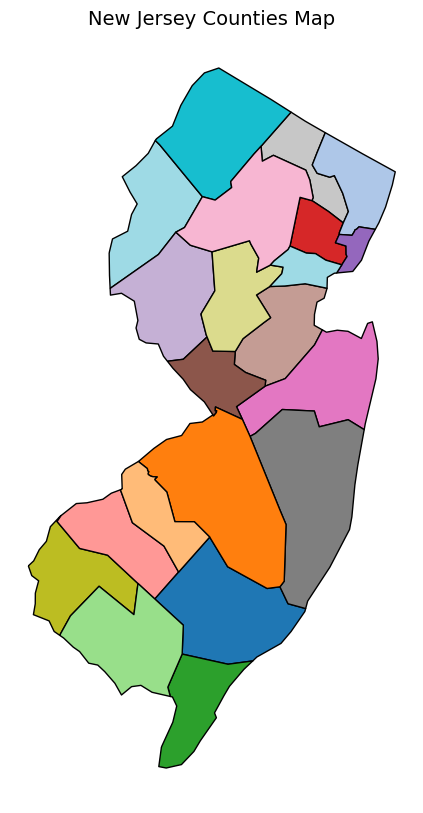

In [5]:
# Load US counties shapefile from a public dataset (or a local file if you have it)
url = "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_20m.zip"
counties = gpd.read_file(url)

# Filter for New Jersey (state FIPS code for NJ is 34)
nj_counties = counties[counties["STATEFP"] == "34"]

# Plot with random colors
fig, ax = plt.subplots(figsize=(10, 10))
nj_counties.plot(column="NAME", cmap="tab20", legend=False, edgecolor="black", ax=ax)

# Add Titles
ax.set_title("New Jersey Counties Map", fontsize=14)
ax.axis("off")  # Hide axes

plt.show()


In [6]:
# Load NJ township boundaries (replace with local file path or use an open-source dataset)
# nj_townships = gpd.read_file("https://raw.githubusercontent.com/openspace/Open-Data/master/New_Jersey_Municipal_Boundaries.geojson")

nj_townships = gpd.read_file("../data/NJ_Municipal_Boundaries_3424_930771950455602469.geojson")

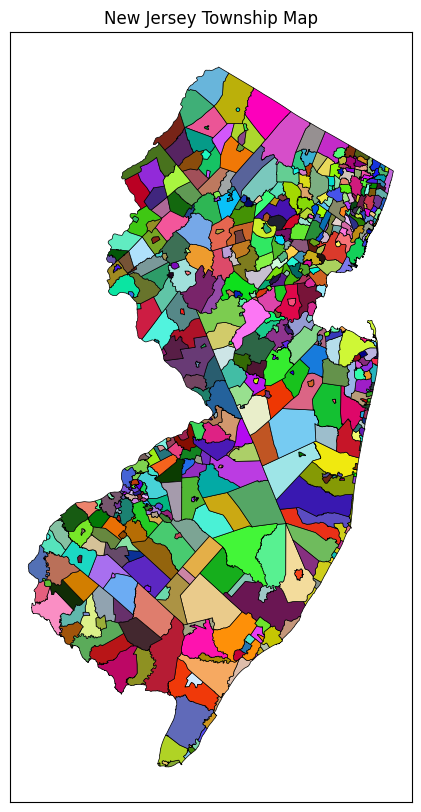

In [7]:
# Generate random colors for each township
nj_townships["color"] = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(nj_townships))]

# Plot the townships
fig, ax = plt.subplots(figsize=(10, 10))
nj_townships.plot(ax=ax, color=nj_townships["color"], edgecolor="black", linewidth=0.5)

# Remove axes for better visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("New Jersey Township Map")

plt.show()

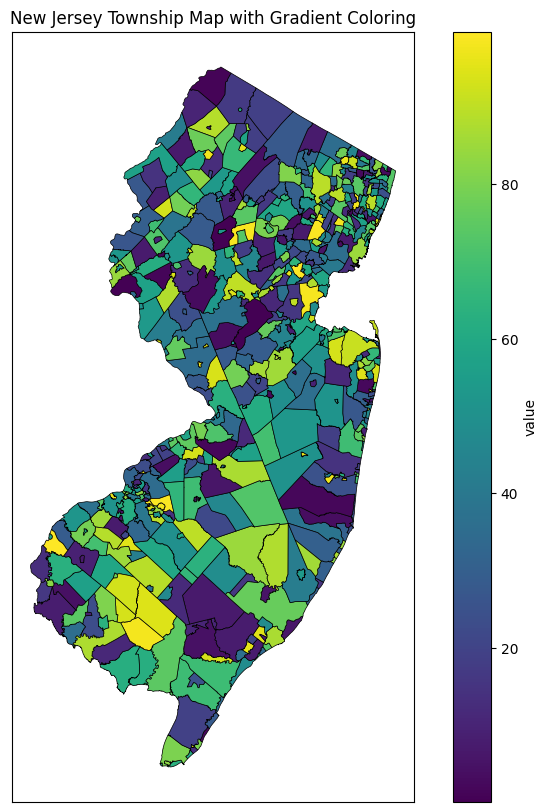

In [8]:
# Example: Assigning random values (Replace with actual data column)
nj_townships["GNIS"]=nj_townships["GNIS"].astype(int)
nj_townships["value"] = np.random.uniform(0, 100, size=len(nj_townships))  # Simulated values

def nj_gradient(
    townships: gpd.geodataframe.GeoDataFrame,
    title:str,
    label:str=None,
    value_col_name:str="value",
    cmap_val:str="viridis",
):

    label = label if label else value_col_name
    
    """ Plot a geoplot with color scales."""
    # Define value range
    v1, v2 = townships[value_col_name].min(), townships[value_col_name].max()
    
    # Normalize values to range [0,1] for colormap
    norm = mcolors.Normalize(vmin=v1, vmax=v2)
    
    # Choose a colormap using the new syntax
    cmap = plt.get_cmap(cmap_val)  # Alternative: mcolors.get_cmap("viridis")
    
    # Assign colors based on normalized values
    townships["color"] = [mcolors.to_hex(cmap(norm(value))) for value in townships[value_col_name]]
    
    # Plot the townships with gradient colors
    fig, ax = plt.subplots(figsize=(10, 10))
    townships.plot(ax=ax, color=townships["color"], edgecolor="black", linewidth=0.5)
    
    # Add a colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(label)
    
    # Remove axes for better visualization
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    
    plt.show()

nj_gradient(nj_townships, title="New Jersey Township Map with Gradient Coloring")

In [9]:
# Usage Example
interactive_map = nj_gradient_interactive(nj_townships, title="New Jersey Township Map")
interactive_map.save("nj_townships_map.html")  # Save to an HTML file
# interactive_map  # Display in Jupyter Notebook (if applicable)


## Data
### Preprocessing State Affordable Housing Table Data

In [10]:
with open("../data/raw_affordable_housing_data.txt", "r") as f:
    content = f.read()

lines = content.split("\n")
header_line = lines[0]
towns = lines[1:]

In [11]:
parsed_data = []
for line in towns:
    tokens = line.split(" ")
    township = " ".join(tokens[:-11])
    parsed_data.append(",".join([township] + tokens[-11::]))

parsed_data = [header_line] + parsed_data

In [ ]:
# with open("../data/state_affordable_housing.csv", "w") as file:
#     for line in parsed_data:
#         file.write(line)
#         file.write("\n")

### Read Preprocessed State Affordable Housing Data

In [12]:
import csv
with open("../data/state_affordable_housing.csv", newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)  # Automatically uses the first row as column names
    data = [row for row in reader]  # Convert to a list of dictionaries
for r in data:
    m = r["Municipality"]
    c = r["County"]
    match_found = False
    for i in range(len(nj_townships)):
        g = nj_townships.iloc[i]
        mun = g["MUN"]
        mun_label = g["MUN_LABEL"]
        if m.lower() in [mun.lower(), mun_label.lower()] and c.lower() == g["COUNTY"].lower():
            match_found = True
            r["GNIS"]=g["GNIS"]
    if not match_found:
        print(m)
print(data[0])

{'Municipality': 'Absecon city', 'County': 'Atlantic', 'Region': '6', 'Present Need': '39', 'Qualified Urban Aid Municipality': 'No', 'Equalized Nonresidential Valuation Factor': '0.97%', 'Land Capacity Factor': '1.11%', 'Income Capacity Factor': '1.44%', 'Average Allocation Factor': '1.17%', 'Prospective Need': '22', '1000/20% Cap': '723', 'Prospective Need with 1000/20% Cap': '22', 'GNIS': np.int64(885134)}


In [20]:
# save_csv("../data/state_affordable_housing.csv", data)

Done saving 564 records to ../data/state_affordable_housing.csv


In [21]:
nj_affordable_housing = pd.read_csv("../data/state_affordable_housing.csv")

## Factors

In [14]:
FACTORS = ["Equalized Nonresidential Valuation Factor", "Land Capacity Factor", "Income Capacity Factor"]

In [15]:
for i, factor in enumerate(FACTORS):
    nj_affordable_housing[f"factor_{i+1}"]=nj_affordable_housing[factor].apply(lambda s: float(s[:-1])/100)

sum(nj_affordable_housing["factor_1"])

6.0003

### LLRP Towns
- The bipartisan coalition — called “Local Leaders for Responsible Planning”

In [16]:
llrp_towns = [
("Allendale", None),
("Cedar Grove", None),
("Closter", None),
("Denville", None),
("East Hanover", None),
("Florham Park", None),
("Franklin Lakes", None),
("Hanover Township", None),
("Hillsdale", None),
("Holmdel", None),
("Little Falls", None),
("Mannington", None),
("Mendham Borough", None),
("Millburn", None),
("Montvale", None),
("Montville", None),
("Norwood", None),
("Old Tappan", None),
("Oradell", None),
("Parsippany-Troy Hills", None),
("Totowa", None),
("Wall Township", None),
("Washington", "Bergen"),
("West Amwell", None),
("Westwood", None),
("Wharton", None),
("Wyckoff", None)
]

llrp_normalized = []
for llrp_t, county in llrp_towns:
    match_found = 0
    for i in range(len(nj_townships)):
        g = nj_townships.iloc[i]
        mun = g["MUN"]
        mun_label = g["MUN_LABEL"]
        gnis = g["GNIS"]
        if (mun.lower().startswith(llrp_t.lower()) or mun_label.lower().startswith(llrp_t.lower())) and \
            (not county or county.lower() == g["COUNTY"].lower()):
            match_found += 1
            llrp_normalized.append({"raw_name": llrp_t, "MUN": mun, "COUNTY": g["COUNTY"], "GNIS": gnis, "LAWSUIT": True})
    if not match_found:
        print("Not found: ", m)
    elif match_found > 1:
        print("More than one found: ", m)
llrp_df = pd.DataFrame(llrp_normalized)

In [17]:
llrp_df['GNIS'].to_list()

[885135,
 882222,
 885190,
 882204,
 882192,
 885221,
 885225,
 882187,
 885255,
 882119,
 882313,
 882133,
 885296,
 882221,
 885306,
 882207,
 885329,
 885336,
 885337,
 882206,
 885420,
 882112,
 882311,
 882181,
 885442,
 885443,
 882309]

In [22]:
merged_df = pd.DataFrame.merge(nj_townships, nj_affordable_housing, on=["GNIS"])
merged_df["LAWSUIT"] = False
merged_df.loc[merged_df["GNIS"].isin(llrp_df["GNIS"].to_list()), "LAWSUIT"] = True
merged_df["value"] = merged_df["Prospective Need with 1000/20% Cap"]

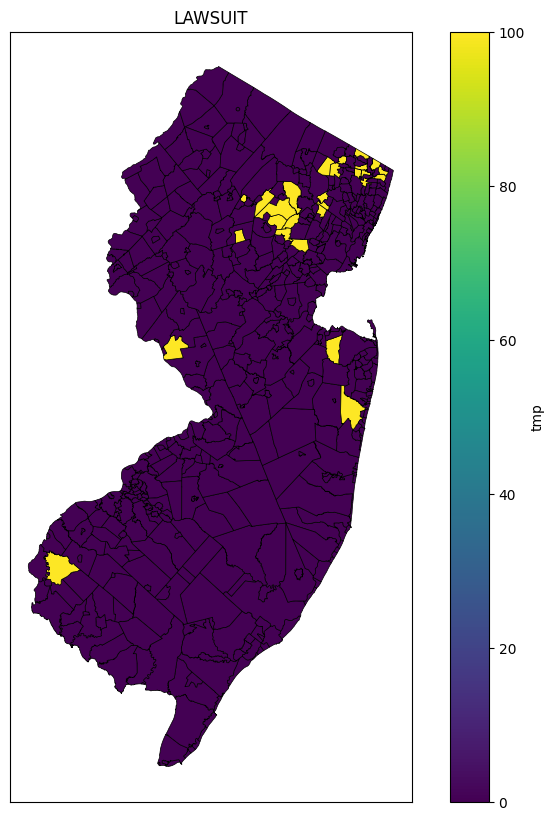

In [23]:
merged_df["tmp"] = 0
merged_df.loc[merged_df["LAWSUIT"], "tmp"] = 100
nj_gradient(merged_df, "LAWSUIT", value_col_name="tmp")

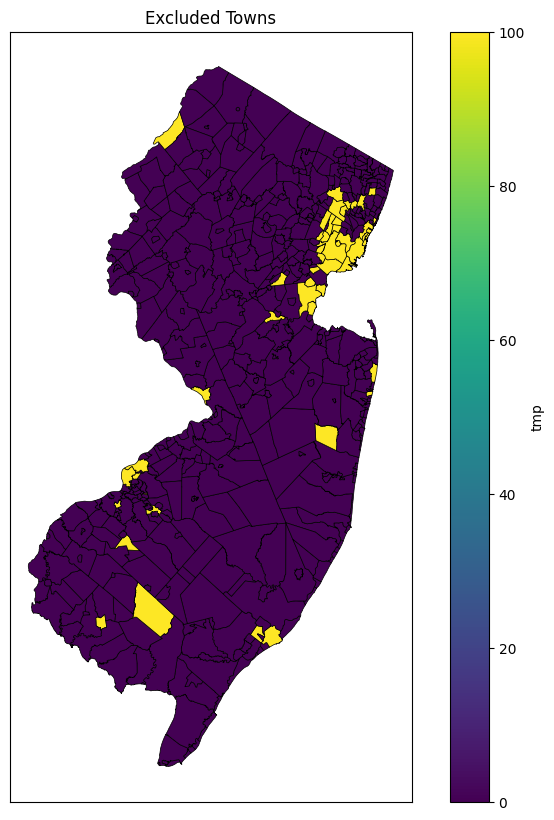

In [24]:
merged_df[merged_df["Prospective Need with 1000/20% Cap"] == 0]

merged_df["tmp"] = 0
merged_df.loc[merged_df["Prospective Need with 1000/20% Cap"] == 0, "tmp"] = 100
nj_gradient(merged_df, "Excluded Towns", value_col_name="tmp")

In [25]:
interactive_map = nj_gradient_interactive(merged_df, "Final Prospective Need", value_col_name="Prospective Need with 1000/20% Cap")
interactive_map.save("nj_townships_map.html")  # Save to an HTML file
# interactive_map  # Display in Jupyter Notebook (if applicable)

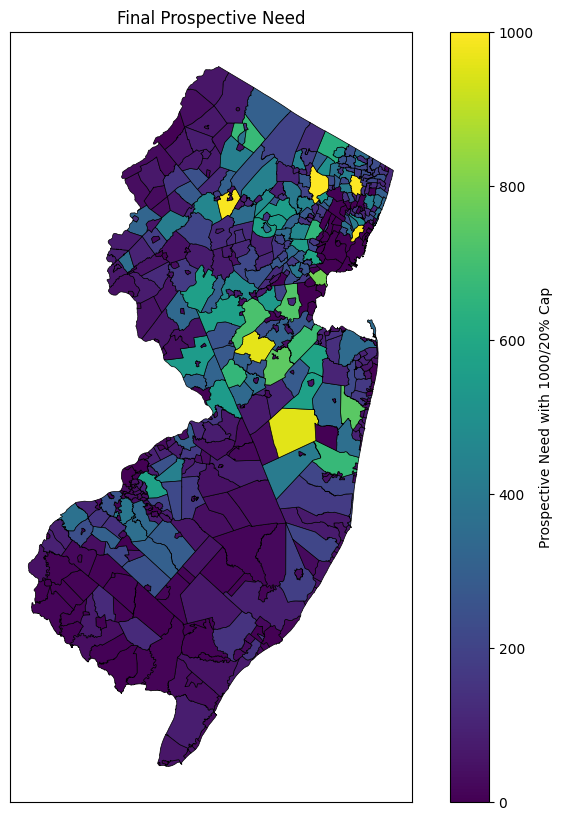

In [26]:
nj_gradient(merged_df, "Final Prospective Need", value_col_name="Prospective Need with 1000/20% Cap")

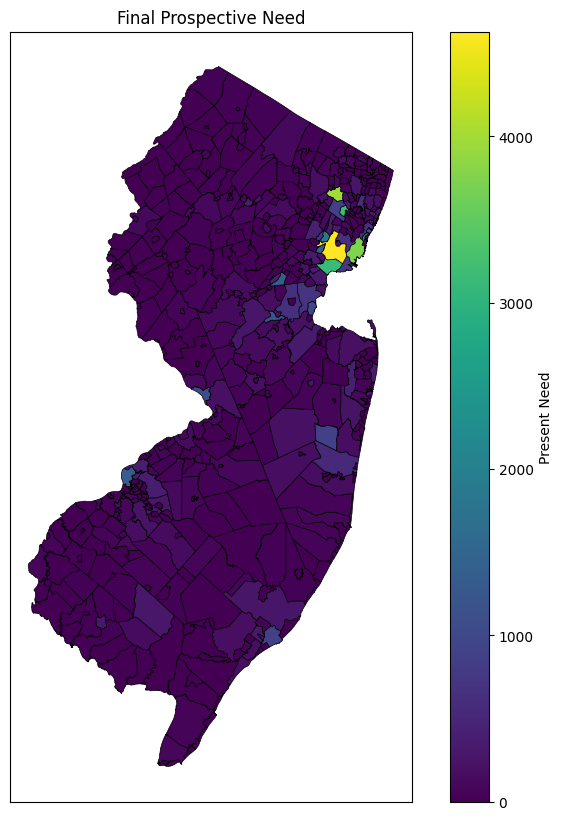

In [27]:
nj_gradient(merged_df, "Final Prospective Need", value_col_name="Present Need")

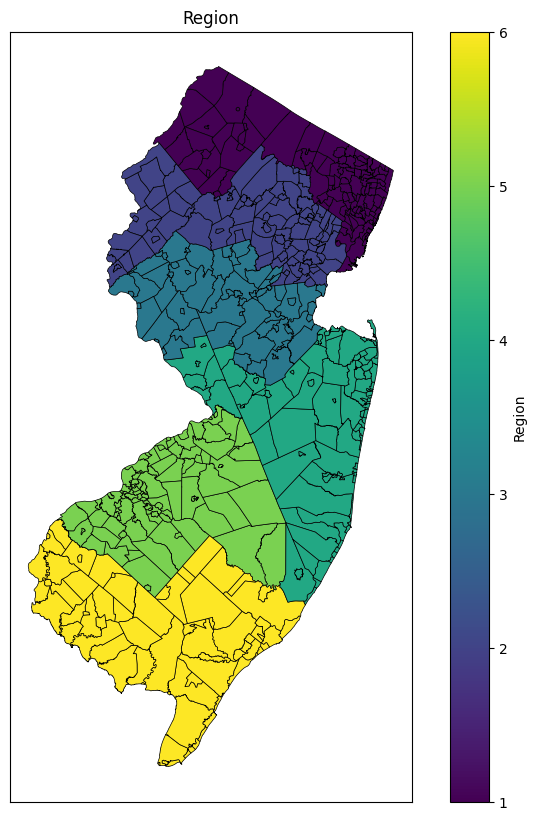

In [28]:
nj_gradient(merged_df, "Region", value_col_name="Region")

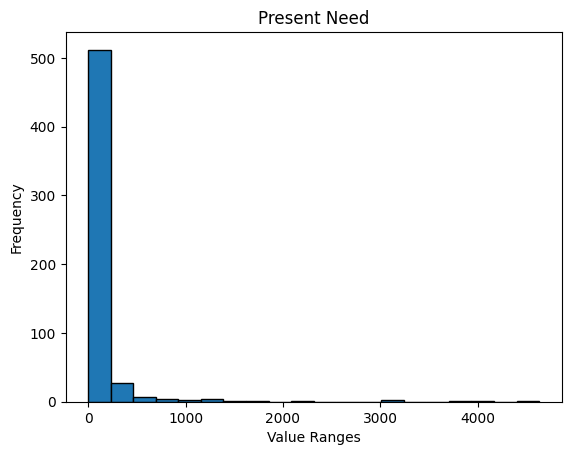

In [29]:
plt.hist(merged_df["Present Need"], bins=20, edgecolor="black")  # Adjust `bins` for grouping
plt.xlabel("Value Ranges")
plt.ylabel("Frequency")
plt.title("Present Need")
plt.show()

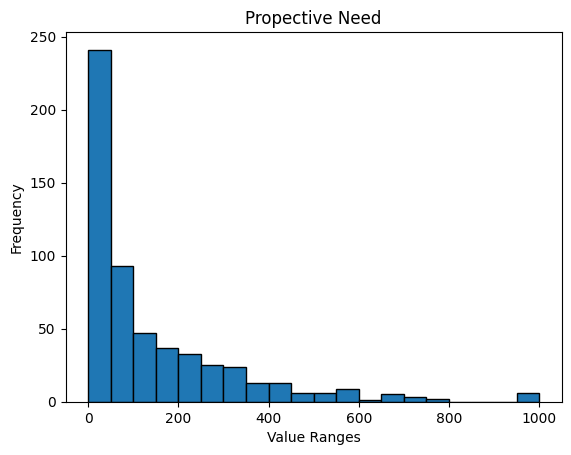

In [30]:
plt.hist(merged_df["Prospective Need with 1000/20% Cap"], bins=20, edgecolor="black")  # Adjust `bins` for grouping
plt.xlabel("Value Ranges")
plt.ylabel("Frequency")
plt.title("Propective Need")
plt.show()

In [31]:
county_stats = merged_df.groupby("County")[["Present Need", "Prospective Need with 1000/20% Cap"]].sum().reset_index()

In [32]:
county_stats

,County,Present Need,Prospective Need with 1000/20% Cap
0,Atlantic,1947,602
1,Bergen,4868,15984
2,Burlington,1281,3229
3,Camden,3636,2449
4,Cape May,431,561
5,Cumberland,829,395
6,Essex,9957,3768
7,Gloucester,1010,3400
8,Hudson,9608,1078
9,Hunterdon,225,2030


In [33]:
capped_towns = merged_df.loc[merged_df["Prospective Need with 1000/20% Cap"] == merged_df["1000/20% Cap"]]
capped_towns_by_county = capped_towns.groupby("County").size().reset_index(name="count")
capped_towns_by_county

,County,count
0,Bergen,9
1,Camden,1
2,Hudson,1
3,Middlesex,1
4,Monmouth,1
5,Ocean,2
6,Passaic,1
7,Somerset,1
8,Sussex,2
9,Warren,2


In [34]:
group_size = merged_df.groupby("County").size().reset_index(name="count")
group_size

,County,count
0,Atlantic,23
1,Bergen,70
2,Burlington,40
3,Camden,36
4,Cape May,16
5,Cumberland,14
6,Essex,22
7,Gloucester,24
8,Hudson,12
9,Hunterdon,26


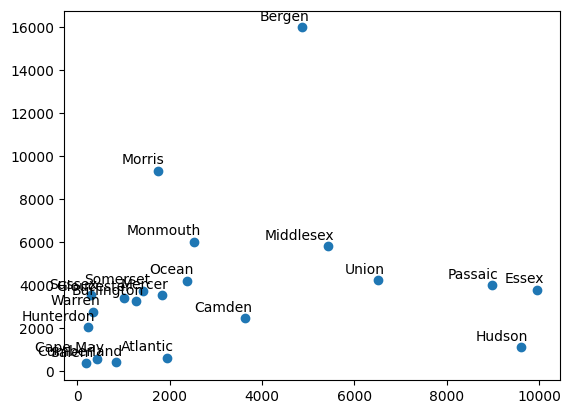

In [35]:
plt.scatter(county_stats["Present Need"], county_stats["Prospective Need with 1000/20% Cap"])
for i, row in county_stats.iterrows():
    plt.annotate(row["County"], (row["Present Need"], row["Prospective Need with 1000/20% Cap"]), textcoords="offset points", xytext=(5,5), ha="right")
    plt.tight_layout

In [ ]:
nj_affordable_housing_ = nj_affordable_housing.loc[(nj_affordable_housing["Qualified Urban Aid Municipality"] == "No") & (nj_affordable_housing["Region"] == 1)]
print(len(nj_affordable_housing_))
plt.scatter(nj_affordable_housing_["factor_2"], nj_affordable_housing_["factor_3"], s=0.1)
# for i, row in nj_affordable_housing.iterrows():
#     plt.annotate(row["County"], (row["factor_1"], row["factor_2"]), textcoords="offset points", xytext=(5,5), ha="right")
plt.tight_layout